In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [16]:
def straight_graph(x,n):
    return x+(1-2*st.bernoulli.rvs(0.5,size = 1)[0])*(x!=0 and x!=n) + st.bernoulli.rvs(0.5,size = 1)[0]*(x==0) - st.bernoulli.rvs(0.5,size = 1)[0]*(x==n)

def complete_graph(x,n):
    return np.random.randint(0,n+1)
print(complete_graph(5,10))

10


In [23]:
n = 50
k = 1000
abscisse = np.arange(k)
plot_straight = np.zeros(k)
for i in range(k-1):
    plot_straight[i+1] = straight_graph(plot_straight[i],n)
plot_complete = np.zeros(k) 
for i in range(k-1):
    plot_complete[i+1] = complete_graph(plot_complete[i],n)

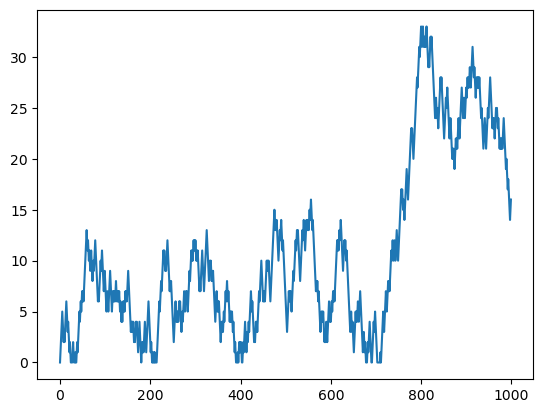

In [24]:
plt.plot(abscisse, plot_straight)


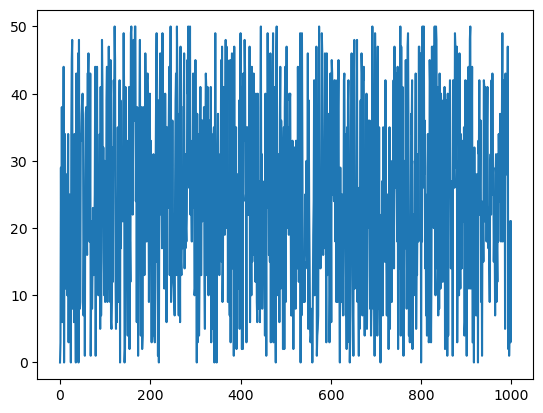

In [25]:
plt.plot(abscisse, plot_complete)

In [30]:
def MH_grand_straight(x):
    y = straight_graph(x,n)
    u = np.random.uniform(size = 1)
    a = 0
    a = min(1,np.exp(x**2/2 - y**2/2))*(y == x+1 or y == x-1)
    if u <= a:
        return y
    else:
        return x
    

In [62]:
n = 10
k = 10000
abscisse = np.arange(k)
plot_MH = np.zeros(k)
plot_MH[0] = 10
for i in range(k-1):
    plot_MH[i+1] = MH_grand_straight(plot_MH[i])

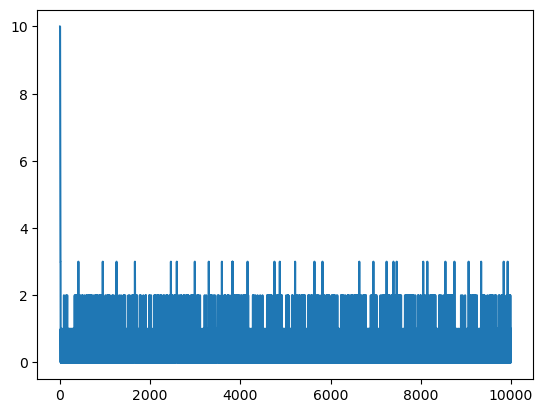

In [64]:
plt.plot(abscisse,plot_MH)

In [63]:
nbr = np.zeros(n+1)
for i in range(k):
    nbr[int(plot_MH[i])]+=1
nbr = nbr/k
z = np.mean(np.exp(-np.arange(n+1)**2/2)/nbr)
print(z)

0.9773276595175908
